In [1]:
import pandas as pd
import numpy as np

In [2]:
kiva_loans = pd.read_csv(r"C:\Users\Pc\Downloads\kiva_loans.csv")
kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,01/01/2014
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,01/01/2014
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,01/01/2014


In [3]:
kiva_loans.count()

id                    671205
funded_amount         671205
loan_amount           671205
activity              671205
sector                671205
use                   666973
country_code          671197
country               671205
region                614405
currency              671205
partner_id            657698
posted_time           671205
disbursed_time        668809
funded_time           622874
term_in_months        671205
lender_count          671205
tags                  499789
borrower_genders      666984
repayment_interval    671205
date                  671205
dtype: int64

In [4]:
kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

### 1.What country got the most loans? Does the number of times a country is referenced relate to the quantity of loans it got?

In [5]:
Country_loans = kiva_loans.groupby("country")["loan_amount"].sum().sort_values(ascending=False).reset_index()
Country_loans

,country,loan_amount
0,Philippines,55342225
1,Kenya,34534300
2,United States,31496375
3,Peru,30867400
4,Paraguay,29629075
...,...,...
82,Mauritania,15000
83,Afghanistan,14000
84,Virgin Islands,10000
85,Vanuatu,9250


In [6]:
import plotly.express as px

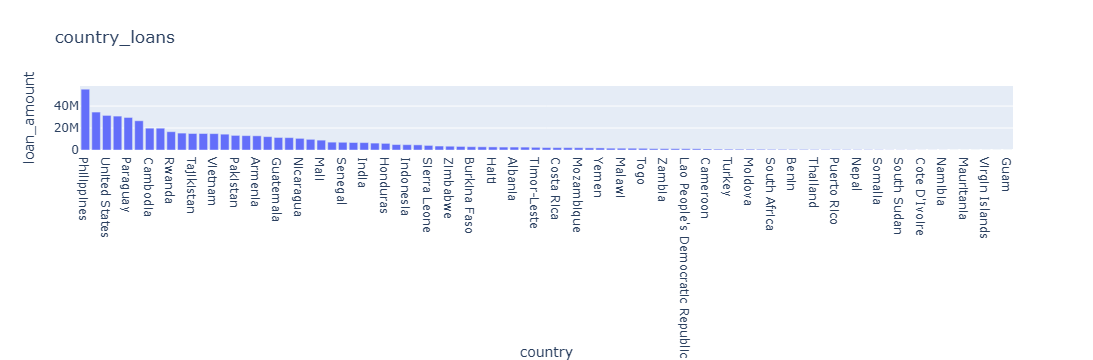

In [7]:
px.bar(Country_loans,x="country",y="loan_amount",title="country_loans",hover_data=["loan_amount"]) 
#It shows that the highest visual is of the phillipines had the highest loan_amount
                           

### Phillipes had the highest loan_amount

In [8]:
Country_loans = kiva_loans.groupby(["country","funded_amount"])["loan_amount"].sum().sort_values(ascending=False).reset_index()
Country_loans

,country,funded_amount,loan_amount
0,United States,10000,8010000
1,Philippines,225,5529475
2,United States,5000,5142300
3,Philippines,325,3832425
4,El Salvador,500,3264475
...,...,...,...
11259,Nepal,50,100
11260,Lao People's Democratic Republic,25,75
11261,The Democratic Republic of the Congo,50,50
11262,Paraguay,25,50


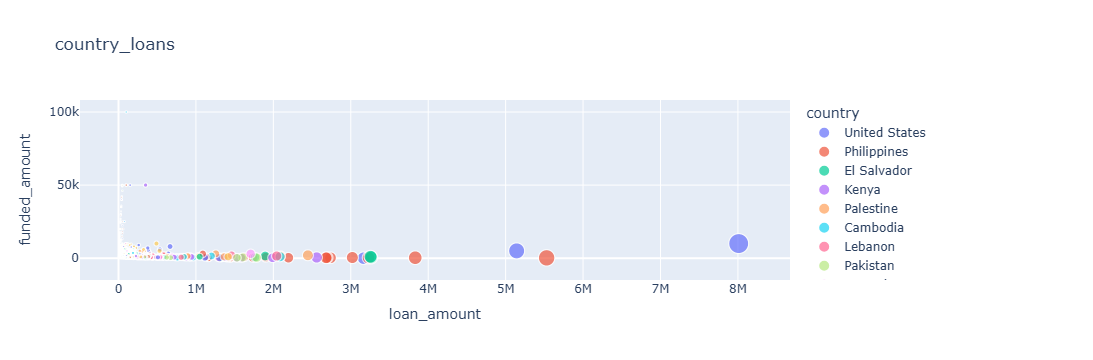

In [9]:
px.scatter(Country_loans,x="loan_amount",y="funded_amount",title="country_loans",color= "country",size = "loan_amount")

In [10]:
correlation = Country_loans["loan_amount"].corr(Country_loans["funded_amount"])
print(f"Correlation between loan amount and funded amount: {correlation:.2f}")

Correlation between loan amount and funded amount: -0.05


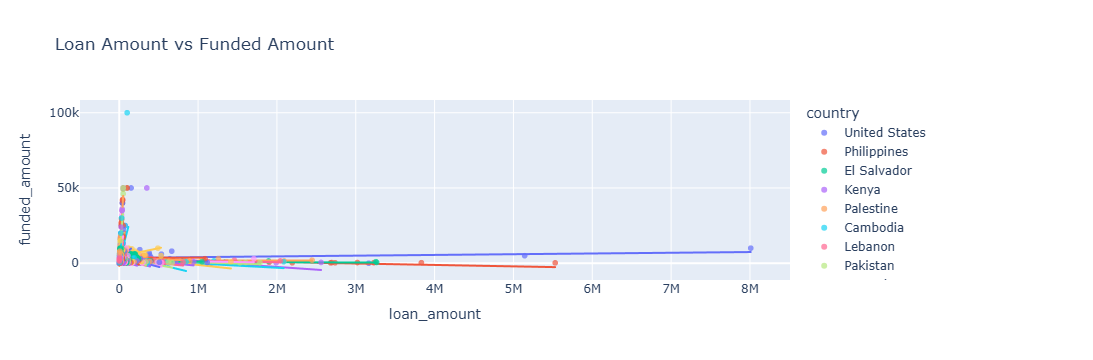

In [11]:
import plotly.express as px

fig = px.scatter(
    Country_loans,
    x="loan_amount",
    y="funded_amount",
    title="Loan Amount vs Funded Amount",
    trendline="ols",  # Ordinary Least Squares regression line
    color="country",  # optional
    opacity=0.7
)

fig.show()


In [12]:
essentially no relationship between loan_amount (requested) and funded_amount (disbursed).

Meaning:

Whether a country request a big loan or a small one doesn’t systematically affect how much they end up being funded in your dataset.

The tiny negative sign suggests a slight tendency for larger requests to get proportionally less funding, but the effect is negligible.

SyntaxError: invalid character '’' (U+2019) (2517207410.py, line 5)

### 2.What sector got the most loans? Does the number of times a sector is referenced relate to the quantity of loans it got?

In [ ]:
kenya_loans = kiva_loans[kiva_loans["country"]=="Kenya"]
kenya_loans.head(3)

In [ ]:
sector_loan = kenya_loans.groupby("sector")["funded_amount"].sum().sort_values(ascending=False).reset_index()
sector_loan

In [ ]:
px.bar(sector_loan,x="sector",y="funded_amount",title="sector_loans amounts",color= "sector")

In [ ]:
loan_correlation = kenya_loans.groupby(["sector","funded_amount"])["loan_amount"].sum().sort_values(ascending=False).reset_index()
loan_correlation

In [ ]:
px.scatter(loan_correlation,x="loan_amount",y="funded_amount",title="sector_loan_amount",color= "sector",size = "loan_amount",trendline="ols",opacity = 0.6)

In [ ]:
px.scatter(loan_correlation,x="loan_amount",y="funded_amount",title="sector_loan_amount",color= "sector",size = "loan_amount",opacity = 0.6)

In [ ]:
merged_data = pd.merge(sector_loan, loan_correlation, on="sector")
merged_data

In [ ]:
px.scatter(merged_data,
           x="funded_amount_x",
           y="funded_amount_y",
           title="sector_loan_amount",
           color= "sector",
           
           opacity = 0.6)

In [ ]:
correlation = loan_correlation["funded_amount"].corr(loan_correlation["loan_amount"])
print(f"Correlation between loan amount and funded amount: {correlation}")

#### As loan amounts increase, funded amounts do not consistently increase or decrease.

#### The relationship may be non-linear, weak, or influenced by other factors like country, sector, or funding policies.

### 3.For the top sector, what activity had the highest amount of loans? What does that say about that activity?


In [ ]:
kenya_loans.head(3)

In [ ]:
top_sector = [loan_correlation["sector"] == "Agrriculture"]
top_sector

In [ ]:
top_sector = kenya_loans[kenya_loans["sector"] == "Agrriculture"]
activity_agriculture = top_sector.groupby("activity")["loan_amount"].sum().sort_values( ascending = False).reset_index()
activity_agriculture

In [ ]:
activity_agriculture

In [ ]:
loans_kenya = kenya_loans.groupby(["sector,activity"])["loan_amount"].sum().sort_values(ascending=False).reset_index()
loans_kenya

In [ ]:
loan_activity = kenya_loans.groupby(["sector","activity"])["loan_amount"].sum().sort_values(ascending=False).reset_index()
loan_activity

In [ ]:
agriculture_loans = loan_activity[loan_activity["sector"] == "Agriculture"]
agriculture_loans

In [ ]:
agriculture_activity = agriculture_loans.groupby("activity")["loan_amount"].sum().sort_values(ascending=False).reset_index()
agriculture_activity

In [ ]:
px.bar(agriculture_activity,x="activity",
      y="loan_amount",title = "activity_loann_amount",color = "activity")

#### It shows that ***Farming*** had the highest demand than the rest of the activity hence it erequired a high loan amount

### 4.Which region had the highest loan amounts?

In [ ]:
regional_loans = kenya_loans.groupby("region")["loan_amount"].sum().sort_values(ascending =False).reset_index()
regional_loans

In [ ]:
px.bar(regional_loans, x= "region",
      y="loan_amount",
      title="regional_loan_amounts",
      color="region")

### 5.What does the loan amount look like for various repayment interval? In various sectors? In various activities?

In [ ]:
kenya_loans.columns

In [ ]:
repayment_activity = kenya_loans.groupby("repayment_interval")["loan_amount"].sum().sort_values(ascending= False).reset_index()
repayment_activity

In [ ]:
px.bar(repayment_activity,
      x = "repayment_interval",
      y="loan_amount",
      color="repayment_interval")

In [ ]:
repayment_sect = kenya_loans.groupby("sector")["loan_amount"].sum().sort_values(ascending= False).reset_index()
repayment_sect

In [ ]:
px.bar(repayment_sect,
      x="sector",
      y="loan_amount",
      color="sector")

In [ ]:
repayment_act = kenya_loans.groupby("activity")["loan_amount"].sum().sort_values(ascending= False).reset_index()
print(repayment_act.dropna)

In [ ]:
px.bar(repayment_act,
      x="activity",
      y="loan_amount")

### 6.What were the numbers between male and female recipients? Does that communicate anything?

In [ ]:
gender_number = kenya_loans["borrower_genders"].value_counts().reset_index()
gender_number.columns = ["borrower_genders","recipient"]
gender_number=gender_number[gender_number["borrower_genders"].isin(["male","female"])]
gender_number

In [ ]:
px.pie(gender_number,
      names="borrower_genders",
      values="recipient",
      title="borrower_gender_amount")

In [ ]:
px.pie(gender_number,
      names="borrower_genders",
      values="recipient",
      hole=0.4)

In [ ]:
top_sector = loan_activity[loan_activity["sector"] == "Agrriculture"]
kenya_loans.groupby(["sector,activity"])["loan_amount"].sum().sort_values(ascending=False).reset_index()

In [ ]:
# Filter out only Agriculture sector
agriculture_loans = loan_activity[loan_activity["sector"] == "Agriculture"]

# Sort by loan_amount descending (just in case)
agriculture_loans = agriculture_loans.sort_values(by="loan_amount", ascending=False)

# Display
print(agriculture_loans)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [ ]:
region_loan = pd.read_csv(r"C:\Users\Pc\Downloads\loan_by_region.csv")
region_loan.head(3)

In [ ]:
region_loan.columns

In [ ]:
region_loan['number']

In [ ]:
region_loan.index

### Instructions: Subset a country and then use that country’s data to answer these questions.

In [ ]:
## SUBSETTED selected Kenya
selected_country = region_loan[region_loan["country"] == "Kenya"]
selected_country.sample()

### What country got the most loans? Does the number of times a country is referenced relate to the quantity of loans it got?

In [ ]:
df_region = region_loan.groupby(["country","number"])["amount"].mean().sort_values(ascending = False).reset_index()
df_region

In [ ]:
df_region.describe # it shows a records of the loans as per the country

In [ ]:
country = df_region["country"]
amount = df_region["amount"]
number = df_region["number"]

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_region["country"], df_region["amount"], color="skyblue",alpha=1, width=0.5)

plt.title("Amount Loan by Country")
plt.xlabel("Country")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)  # Rotate country names for readability

plt.tight_layout()
plt.show()

In [ ]:
country_counts = region_loan["country"].value_counts().reset_index()
country_counts.columns = ["country", "number"]

In [ ]:
country_counts

In [ ]:
correlation = df_region["amount"].corr(df_region["amount"])
print("Correlation:", correlation)

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(country_counts["country"], country_counts["number"], 
            color="green", alpha=0.7, s=100, edgecolors="black")

plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Occurrences")
plt.title("Number of Times Each Country Appears")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: df_region with columns "loan_count" and "total_loans"
x = df_region["amount"]
y = df_region["amount"]

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label="Data points")

# Calculate the OLS regression line manually
m, b = np.polyfit(x, y, 1)  # 1 means linear
plt.plot(x, m*x + b, color="red", label="OLS Trendline")

# Labels and title
plt.xlabel("Loan Count")
plt.ylabel("Total Loan Amount")
plt.title("Loan Count vs Total Loan Amount by Country")
plt.legend()
plt.show()

In [ ]:
country_loans = pd.read_csv(r"C:\Users\Pc\Downloads\mpi_region_locations.csv")
country_loans.head(3)

In [ ]:
country_loans["country"]

In [ ]:
pd.set_option("display.max_rows", None)
print(country_loans["country"])# Show the full list of countries

In [ ]:
df= country_loans.groupby("country")[""]

In [ ]:
kenya_loans = country_loans[country_loans["country"] == "Kenya"]

In [ ]:
pd.set_option("display.max_rows", None)
kenya_loans.describe